<a href="https://colab.research.google.com/github/manojsa13/Spark-Foundation---Stock-Market-Prediction-using-Numerical-and-Textual-Analysis/blob/main/Stock_Market_Prediction_using_Numerical_and_Textual_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

from google.colab import files 
uploaded = files.upload()

Saving GOOG.csv to GOOG.csv


In [1]:
from google.colab import files 
uploaded = files.upload()

Saving india-news-headlines.csv to india-news-headlines (1).csv


In [47]:
import os
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import itertools
from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.tsa.arima_model import ARIMA
import nltk
import re
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('vader_lexicon')
from textblob import TextBlob
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.stem.porter import PorterStemmer
from nltk.stem import PorterStemmer
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
import xgboost 
import lightgbm

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [48]:
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [49]:
df_prices = pd.read_csv('GOOG.csv')
print(df_prices.head())
print(df_prices.size)

         Date        Open        High         Low       Close   Adj Close  \
0  2021-12-03  144.495499  145.212997  141.149994  142.520493  142.520493   
1  2021-12-06  143.574005  144.351501  140.647003  143.796494  143.796494   
2  2021-12-07  145.949997  148.300003  145.702499  148.036499  148.036499   
3  2021-12-08  148.331497  149.156494  147.199997  148.720505  148.720505   
4  2021-12-09  148.175995  149.604996  147.529007  148.106003  148.106003   

     Volume  
0  26688000  
1  22198000  
2  23258000  
3  18964000  
4  18580000  
1764


In [50]:

#Converting Date column to datetime datatype
df_prices['Date'] = pd.to_datetime(df_prices['Date'])
df_prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       252 non-null    datetime64[ns]
 1   Open       252 non-null    float64       
 2   High       252 non-null    float64       
 3   Low        252 non-null    float64       
 4   Close      252 non-null    float64       
 5   Adj Close  252 non-null    float64       
 6   Volume     252 non-null    int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 13.9 KB


In [51]:

df_prices.dropna(inplace = True)

Text(0, 0.5, 'Close')

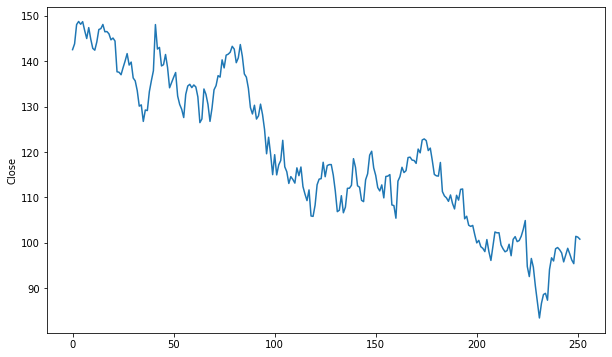

In [52]:
plt.figure(figsize=(10, 6))
df_prices['Close'].plot()
plt.ylabel('Close')   

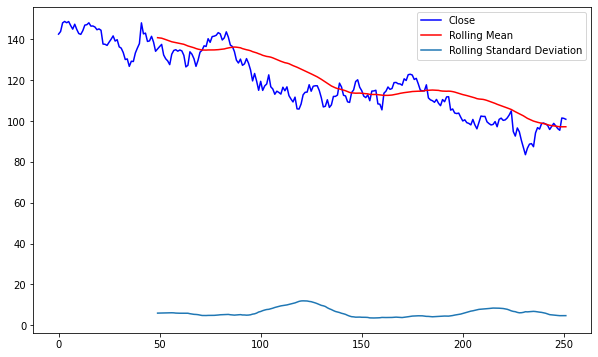

In [53]:
#Plotting moving average
close = df_prices['Close']
ma = close.rolling(window = 50).mean()
std = close.rolling(window = 50).std()

plt.figure(figsize=(10, 6))
df_prices['Close'].plot(color = 'b', label = 'Close')
ma.plot(color = 'r', label = 'Rolling Mean')
std.plot(label = 'Rolling Standard Deviation')
plt.legend()     


Text(0.5, 1.0, 'Returns')

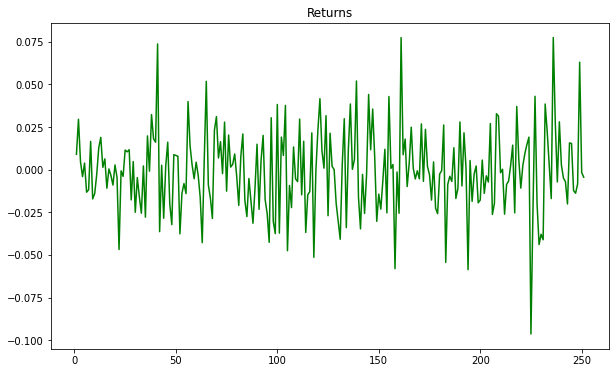

In [54]:
#Plotting returns
returns = close / close.shift(1) - 1

plt.figure(figsize = (10,6))
returns.plot(label='Return', color = 'g')
plt.title("Returns")

In [55]:
train = df_prices[:100]
test = df_prices[100:]

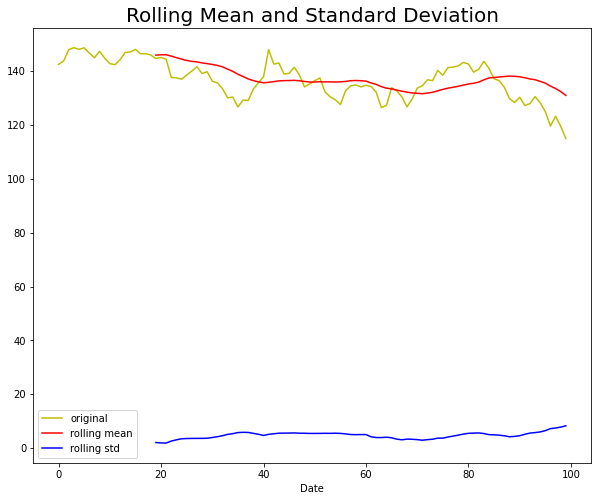

Results of dickey fuller test
ADF Test Statistic : -0.8410561816431774
p-value : 0.8067637409952588
#Lags Used : 0
Number of Observations Used : 99
Weak evidence against null hypothesis, time series is non-stationary 


In [56]:
#Stationarity test
def test_stationarity(timeseries):

 #Determing rolling statistics
 rolmean = timeseries.rolling(20).mean()
 rolstd = timeseries.rolling(20).std()

 #Plot rolling statistics:
 plt.figure(figsize = (10,8))
 plt.plot(timeseries, color = 'y', label = 'original')
 plt.plot(rolmean, color = 'r', label = 'rolling mean')
 plt.plot(rolstd, color = 'b', label = 'rolling std')
 plt.xlabel('Date')
 plt.legend()
 plt.title('Rolling Mean and Standard Deviation',  fontsize = 20)
 plt.show(block = False)
 
 print('Results of dickey fuller test')
 result = adfuller(timeseries, autolag = 'AIC')
 labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
 for value,label in zip(result, labels):
   print(label+' : '+str(value) )
 if result[1] <= 0.05:
   print("Strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is stationary")
 else:
   print("Weak evidence against null hypothesis, time series is non-stationary ")
test_stationarity(train['Close'])   

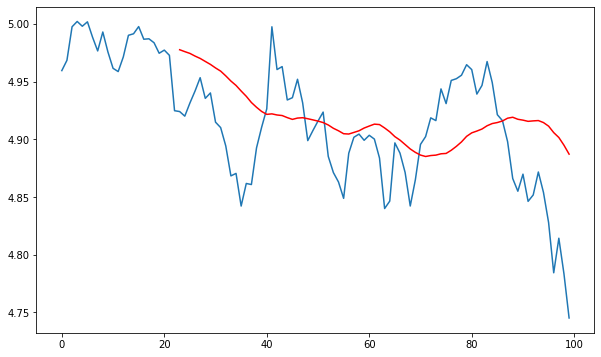

In [57]:
train_log = np.log(train['Close']) 
test_log = np.log(test['Close'])

mav = train_log.rolling(24).mean() 
plt.figure(figsize = (10,6))
plt.plot(train_log) 
plt.plot(mav, color = 'red') 

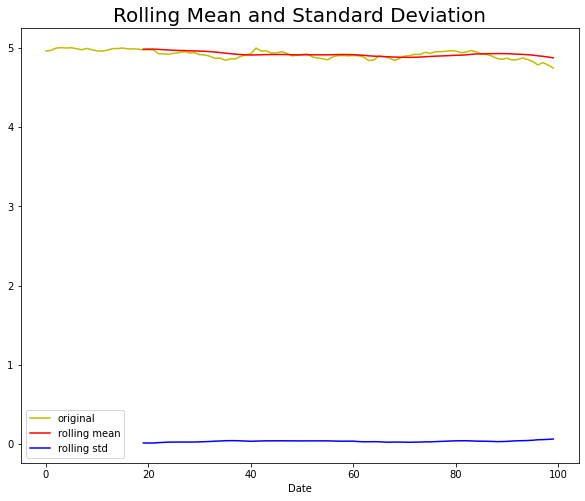

Results of dickey fuller test
ADF Test Statistic : -0.6830509864471132
p-value : 0.8510910055319578
#Lags Used : 0
Number of Observations Used : 99
Weak evidence against null hypothesis, time series is non-stationary 


In [58]:
train_log.dropna(inplace = True)
test_log.dropna(inplace = True)

test_stationarity(train_log)

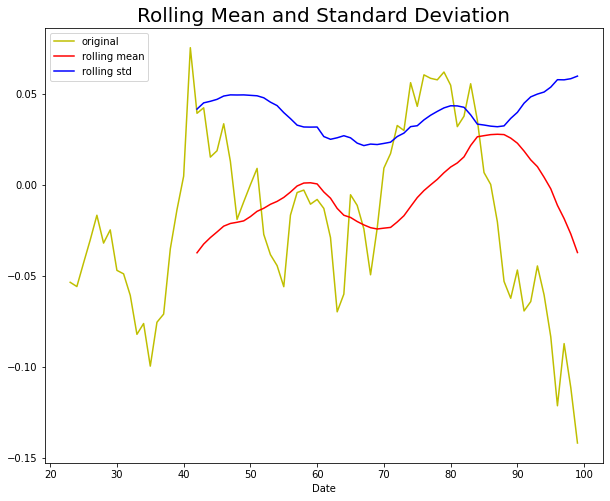

Results of dickey fuller test
ADF Test Statistic : -1.265699406881317
p-value : 0.6447151942644155
#Lags Used : 0
Number of Observations Used : 76
Weak evidence against null hypothesis, time series is non-stationary 


In [59]:
train_log_diff = train_log - mav
train_log_diff.dropna(inplace = True)

test_stationarity(train_log_diff)

In [60]:
#Using auto arima to make predictions using log data
from pmdarima import auto_arima
model = auto_arima(train_log, trace = True, error_action = 'ignore', suppress_warnings = True)
model.fit(train_log)
predictions = model.predict(n_periods = len(test))
predictions = pd.DataFrame(predictions,index = test_log.index,columns=['Prediction'])

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-474.027, Time=0.57 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-481.778, Time=0.10 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-479.898, Time=0.09 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-479.887, Time=0.11 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-482.711, Time=0.10 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-477.941, Time=0.20 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 1.192 seconds


Text(0, 0.5, 'Actual Stock Price')

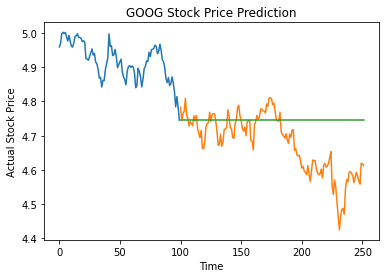

In [61]:
plt.plot(train_log, label='Train')
plt.plot(test_log, label='Test')
plt.plot(predictions, label='Prediction')
plt.title('GOOG Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Actual Stock Price')

In [62]:
#Calculating error
rms = np.sqrt(mean_squared_error(test_log,predictions))
print("RMSE : ", rms)

RMSE :  0.1087999246091431


In [63]:
cols = ['Date','Category','News']
df_news = pd.read_csv('india-news-headlines (1).csv', names = cols)
df_news

,Date,Category,News
0,publish_date,headline_category,headline_text
1,20010102,unknown,Status quo will not be disturbed at Ayodhya; s...
2,20010102,unknown,Fissures in Hurriyat over Pak visit
3,20010102,unknown,America's unwanted heading for India?
4,20010102,unknown,For bigwigs; it is destination Goa
...,...,...,...
3650966,20220331,city.srinagar,J&K sacks 2 cops; 3 other employees over terro...
3650967,20220331,entertainment.hindi.bollywood,Ranbir Kapoor says 'Rishi Kapoor enjoyed his a...
3650968,20220331,city.trichy,As Covid-19 cases drop to nil in southern dist...
3650969,20220331,city.erode,Tamil Nadu sees marginal rise of Covid cases w...


In [64]:
df_news.drop(0, inplace=True)
df_news.drop('Category', axis = 1, inplace=True)
df_news.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3650970 entries, 1 to 3650970
Data columns (total 2 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   Date    object
 1   News    object
dtypes: object(2)
memory usage: 83.6+ MB


In [65]:
 #Converting data type of Date column 
 df_news['Date'] = pd.to_datetime(df_news['Date'],format= '%Y%m%d')
 df_news

,Date,News
1,2001-01-02,Status quo will not be disturbed at Ayodhya; s...
2,2001-01-02,Fissures in Hurriyat over Pak visit
3,2001-01-02,America's unwanted heading for India?
4,2001-01-02,For bigwigs; it is destination Goa
5,2001-01-02,Extra buses to clear tourist traffic
...,...,...
3650966,2022-03-31,J&K sacks 2 cops; 3 other employees over terro...
3650967,2022-03-31,Ranbir Kapoor says 'Rishi Kapoor enjoyed his a...
3650968,2022-03-31,As Covid-19 cases drop to nil in southern dist...
3650969,2022-03-31,Tamil Nadu sees marginal rise of Covid cases w...


In [66]:
#Grouping the headlines for each day
df_news['News'] = df_news.groupby(['Date']).transform(lambda x : ' '.join(x)) 
df_news = df_news.drop_duplicates() 
df_news.reset_index(inplace = True, drop = True)
df_news

,Date,News
0,2001-01-02,Status quo will not be disturbed at Ayodhya; s...
1,2001-01-03,Powerless north India gropes in the dark Think...
2,2001-01-04,The string that pulled Stephen Hawking to Indi...
3,2001-01-05,Light combat craft takes India into club class...
4,2001-01-06,Light combat craft takes India into club class...
...,...,...
7712,2022-03-27,Playing a dead man in Body God meant sitting i...
7713,2022-03-28,As fashion becomes democratic; demand for styl...
7714,2022-03-29,Bobby Deol: Like my dad; I hope to be working ...
7715,2022-03-30,I will not give in to trends: Dossmode The tim...


In [67]:
df_news['News']

0       Status quo will not be disturbed at Ayodhya; s...
1       Powerless north India gropes in the dark Think...
2       The string that pulled Stephen Hawking to Indi...
3       Light combat craft takes India into club class...
4       Light combat craft takes India into club class...
                              ...                        
7712    Playing a dead man in Body God meant sitting i...
7713    As fashion becomes democratic; demand for styl...
7714    Bobby Deol: Like my dad; I hope to be working ...
7715    I will not give in to trends: Dossmode The tim...
7716    Shashank goes back to coastal Karnataka and Mo...
Name: News, Length: 7717, dtype: object

In [68]:
#Cleaning headlines
ps = PorterStemmer()
c = []
for i in range(0,len(df_news['News'])):
    news = re.sub('[^a-zA-Z]',' ',df_news['News'][i])
    news = news.lower()
    news = news.split()
    news = [ps.stem(word) for word in news if not word in set(stopwords.words('english'))]
    news=' '.join(news)
    c.append(news)  

In [69]:
df_news['News'] = pd.Series(c)
df_news

,Date,News
0,2001-01-02,statu quo disturb ayodhya say vajpaye fissur h...
1,2001-01-03,powerless north india grope dark think laxman ...
2,2001-01-04,string pull stephen hawk india vajpaye give bi...
3,2001-01-05,light combat craft take india club class hawk ...
4,2001-01-06,light combat craft take india club class hawk ...
...,...,...
7712,2022-03-27,play dead man bodi god meant sit refriger guru...
7713,2022-03-28,fashion becom democrat demand stylist soar las...
7714,2022-03-29,bobbi deol like dad hope work age yasha surya ...
7715,2022-03-30,give trend dossmod time gave boyfriend incred ...


In [70]:
#Functions to get the subjectivity and polarity
def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity

def getPolarity(text):
  return  TextBlob(text).sentiment.polarity

In [71]:
#Adding subjectivity and polarity columns
df_news['Subjectivity'] = df_news['News'].apply(getSubjectivity)
df_news['Polarity'] = df_news['News'].apply(getPolarity)
df_news

,Date,News,Subjectivity,Polarity
0,2001-01-02,statu quo disturb ayodhya say vajpaye fissur h...,0.298148,0.099074
1,2001-01-03,powerless north india grope dark think laxman ...,0.429167,0.025000
2,2001-01-04,string pull stephen hawk india vajpaye give bi...,0.475140,0.032481
3,2001-01-05,light combat craft take india club class hawk ...,0.458412,0.296404
4,2001-01-06,light combat craft take india club class hawk ...,0.425758,0.389394
...,...,...,...,...
7712,2022-03-27,play dead man bodi god meant sit refriger guru...,0.356716,0.087855
7713,2022-03-28,fashion becom democrat demand stylist soar las...,0.382331,0.079270
7714,2022-03-29,bobbi deol like dad hope work age yasha surya ...,0.372864,0.083037
7715,2022-03-30,give trend dossmod time gave boyfriend incred ...,0.330696,0.052339


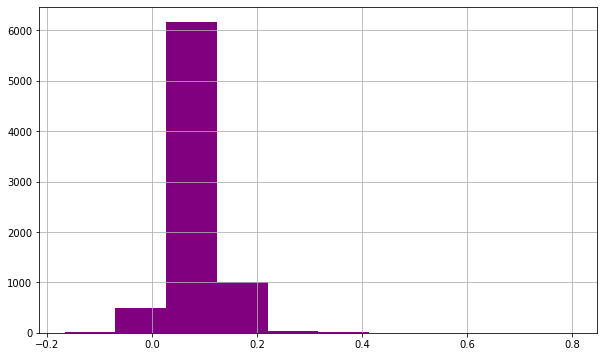

In [72]:
plt.figure(figsize = (10,6))
df_news['Polarity'].hist(color = 'purple')

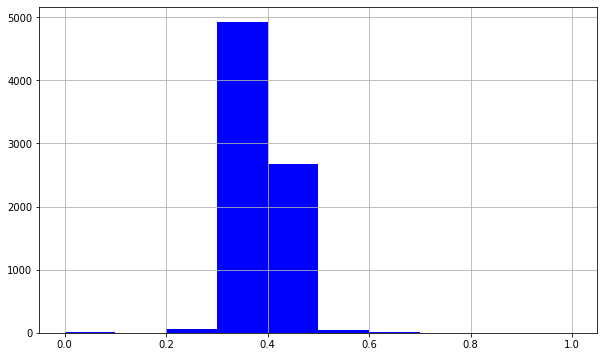

In [73]:
plt.figure(figsize = (10,6))
df_news['Subjectivity'].hist(color = 'blue')

In [74]:
#Adding sentiment score to df_news
sia = SentimentIntensityAnalyzer()

df_news['Compound'] = [sia.polarity_scores(v)['compound'] for v in df_news['News']]
df_news['Negative'] = [sia.polarity_scores(v)['neg'] for v in df_news['News']]
df_news['Neutral'] = [sia.polarity_scores(v)['neu'] for v in df_news['News']]
df_news['Positive'] = [sia.polarity_scores(v)['pos'] for v in df_news['News']]
df_news

,Date,News,Subjectivity,Polarity,Compound,Negative,Neutral,Positive
0,2001-01-02,statu quo disturb ayodhya say vajpaye fissur h...,0.298148,0.099074,-0.8555,0.125,0.773,0.102
1,2001-01-03,powerless north india grope dark think laxman ...,0.429167,0.025000,-0.5994,0.132,0.755,0.113
2,2001-01-04,string pull stephen hawk india vajpaye give bi...,0.475140,0.032481,0.9169,0.099,0.791,0.110
3,2001-01-05,light combat craft take india club class hawk ...,0.458412,0.296404,-0.3612,0.171,0.659,0.170
4,2001-01-06,light combat craft take india club class hawk ...,0.425758,0.389394,-0.7579,0.207,0.649,0.144
...,...,...,...,...,...,...,...,...
7712,2022-03-27,play dead man bodi god meant sit refriger guru...,0.356716,0.087855,-0.9999,0.149,0.782,0.069
7713,2022-03-28,fashion becom democrat demand stylist soar las...,0.382331,0.079270,-0.9998,0.144,0.778,0.078
7714,2022-03-29,bobbi deol like dad hope work age yasha surya ...,0.372864,0.083037,-0.9997,0.129,0.799,0.072
7715,2022-03-30,give trend dossmod time gave boyfriend incred ...,0.330696,0.052339,-0.9998,0.139,0.794,0.067


In [75]:
df_merge = pd.merge(df_prices, df_news, how='inner', on='Date')
df_merge

,Date,Open,High,Low,Close,Adj Close,Volume,News,Subjectivity,Polarity,Compound,Negative,Neutral,Positive
0,2021-12-03,144.495499,145.212997,141.149994,142.520493,142.520493,26688000,mumbai tree cut hill ruin along vihar lake cyc...,0.360255,0.063249,-0.9999,0.141,0.797,0.062
1,2021-12-06,143.574005,144.351501,140.647003,143.796494,143.796494,22198000,din bmc shiv sena ploy clear land transfer bjp...,0.384220,0.046421,-0.9999,0.148,0.799,0.053
2,2021-12-07,145.949997,148.300003,145.702499,148.036499,148.036499,23258000,bihar coupl return abroad test covid rs lakh l...,0.385167,0.050191,-0.9999,0.139,0.798,0.063
3,2021-12-08,148.331497,149.156494,147.199997,148.720505,148.720505,18964000,muh onlin practic exam nod extern examin retd ...,0.349915,0.011324,-0.9999,0.143,0.797,0.060
4,2021-12-09,148.175995,149.604996,147.529007,148.106003,148.106003,18580000,horoscop today decemb check astrolog predict a...,0.330860,0.036993,-0.9999,0.148,0.785,0.067
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,2022-03-25,141.753998,141.959503,139.699493,141.521500,141.521500,19270000,speed shortcut tackl unruli custom take deliv ...,0.377083,0.026320,-0.9999,0.146,0.795,0.059
78,2022-03-28,140.684494,141.976501,139.828156,141.949997,141.949997,23774000,fashion becom democrat demand stylist soar las...,0.382331,0.079270,-0.9998,0.144,0.778,0.078
79,2022-03-29,143.160507,144.162506,142.483994,143.250000,143.250000,28678000,bobbi deol like dad hope work age yasha surya ...,0.372864,0.083037,-0.9997,0.129,0.799,0.072
80,2022-03-30,142.869995,143.480499,142.167999,142.644501,142.644501,21046000,give trend dossmod time gave boyfriend incred ...,0.330696,0.052339,-0.9998,0.139,0.794,0.067


In [76]:
df = df_merge[['Close','Subjectivity', 'Polarity', 'Compound', 'Negative', 'Neutral' ,'Positive']]
df

,Close,Subjectivity,Polarity,Compound,Negative,Neutral,Positive
0,142.520493,0.360255,0.063249,-0.9999,0.141,0.797,0.062
1,143.796494,0.384220,0.046421,-0.9999,0.148,0.799,0.053
2,148.036499,0.385167,0.050191,-0.9999,0.139,0.798,0.063
3,148.720505,0.349915,0.011324,-0.9999,0.143,0.797,0.060
4,148.106003,0.330860,0.036993,-0.9999,0.148,0.785,0.067
...,...,...,...,...,...,...,...
77,141.521500,0.377083,0.026320,-0.9999,0.146,0.795,0.059
78,141.949997,0.382331,0.079270,-0.9998,0.144,0.778,0.078
79,143.250000,0.372864,0.083037,-0.9997,0.129,0.799,0.072
80,142.644501,0.330696,0.052339,-0.9998,0.139,0.794,0.067


In [77]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
new_df = pd.DataFrame(sc.fit_transform(df))
new_df.columns = df.columns
new_df.index = df.index
new_df.head()

,Close,Subjectivity,Polarity,Compound,Negative,Neutral,Positive
0,0.721423,0.462838,0.311260,0.0,0.388060,0.600000,0.209302
1,0.778756,0.663626,0.210384,0.0,0.492537,0.630769,0.000000
2,0.969266,0.671561,0.232982,0.0,0.358209,0.615385,0.232558
3,1.000000,0.376206,0.000000,0.0,0.417910,0.600000,0.162791
4,0.972389,0.216559,0.153869,0.0,0.492537,0.415385,0.325581


In [78]:
X = new_df.drop('Close', axis=1)
y =new_df['Close']

In [79]:
X.head()

,Subjectivity,Polarity,Compound,Negative,Neutral,Positive
0,0.462838,0.311260,0.0,0.388060,0.600000,0.209302
1,0.663626,0.210384,0.0,0.492537,0.630769,0.000000
2,0.671561,0.232982,0.0,0.358209,0.615385,0.232558
3,0.376206,0.000000,0.0,0.417910,0.600000,0.162791
4,0.216559,0.153869,0.0,0.492537,0.415385,0.325581


In [80]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)
x_train.shape

(65, 6)

In [81]:
x_train[:10]

,Subjectivity,Polarity,Compound,Negative,Neutral,Positive
74,0.501841,0.321595,0.000000,0.402985,0.661538,0.093023
48,0.660372,0.558529,0.428571,0.164179,0.507692,0.697674
38,0.609897,0.410872,0.428571,0.119403,0.600000,0.604651
6,0.184994,0.498919,0.000000,0.611940,0.353846,0.232558
3,0.376206,0.000000,0.000000,0.417910,0.600000,0.162791
52,0.496101,0.370726,0.000000,0.417910,0.507692,0.325581
7,0.453855,0.534229,0.142857,0.253731,0.584615,0.418605
66,0.855874,0.544366,0.428571,0.104478,0.738462,0.441860
45,0.749280,0.641849,0.571429,0.044776,0.800000,0.465116
54,0.204201,0.200649,0.142857,0.492537,0.323077,0.465116


In [82]:
rf = RandomForestRegressor()
rf.fit(x_train, y_train)
prediction=rf.predict(x_test)

In [83]:
print(prediction[:10])
print(y_test[:10])
print(mean_squared_error(prediction,y_test))

[0.58731832 0.62655913 0.81786111 0.4363472  0.46074483 0.65379415
 0.43892585 0.66440065 0.49432018 0.54194662]
27    0.682220
2     0.969266
62    0.254201
43    0.743687
8     0.939252
42    0.727264
40    0.512850
13    0.920404
79    0.754201
53    0.179862
Name: Close, dtype: float64
0.08203317054973196


In [84]:
adb = AdaBoostRegressor()
adb.fit(x_train, y_train)
predictions = adb.predict(x_test)

In [85]:
print(mean_squared_error(predictions, y_test))

0.08865483198729746


In [86]:
from sklearn.tree import DecisionTreeRegressor
dec_tree = DecisionTreeRegressor()
dec_tree.fit(x_train, y_train)
predictions = dec_tree.predict(x_test)

In [87]:
print(predictions[:10])
print(y_test[:10])
print(mean_squared_error(predictions,y_test))

[0.13200914 0.97050189 1.         0.26258091 0.77875585 0.79780738
 0.60895933 0.77875585 0.60895933 0.87787552]
27    0.682220
2     0.969266
62    0.254201
43    0.743687
8     0.939252
42    0.727264
40    0.512850
13    0.920404
79    0.754201
53    0.179862
Name: Close, dtype: float64
0.14202024670812807


In [88]:
lgb = lightgbm.LGBMRegressor()
lgb.fit(x_train, y_train)

LGBMRegressor()

In [89]:
predictions = lgb.predict(x_test)
print(mean_squared_error(predictions,y_test))

0.09717454909946345


In [90]:
xgb = xgboost.XGBRegressor()
xgb.fit(x_train, y_train)

[19:06:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

In [91]:
predictions = xgb.predict(x_test)
print(mean_squared_error(predictions,y_test))

0.08541998564036371
